In [1]:
# import the necessary packages

# For working with neural networks
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model

# For data processing
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# loading the MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# print shape of each variable
print("train image shape:",x_train.shape)  
print("train label shape:",y_train.shape) 
print("test image shape:",x_test.shape) 
print("test label shape:",y_test.shape)

train image shape: (60000, 28, 28)
train label shape: (60000,)
test image shape: (10000, 28, 28)
test label shape: (10000,)


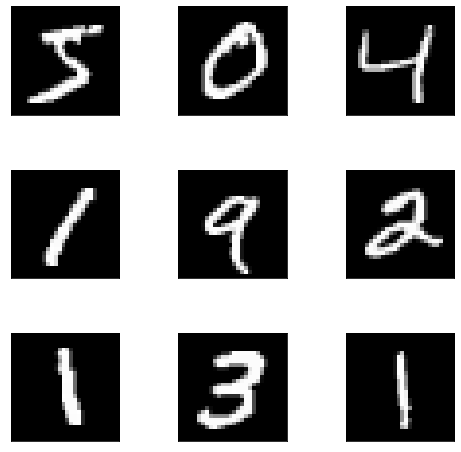

In [2]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
       
plt.show()

In [3]:
# convert to 4 dimension
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])

# convert to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# divide by max value 255
x_train=x_train/225.0
x_test=x_test/255.0

In [4]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [5]:
model=Sequential()

# first block
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second block
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# flattening followed by dense layer and final output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 128)         0

In [6]:
# compiling the model
model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])

# train the model training dataset
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/3
1875/1875 [==============================] - 74s 39ms/step - loss: 0.4829 - accuracy: 0.8433 - val_loss: 0.0754 - val_accuracy: 0.9796
Epoch 2/3
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.0577 - val_accuracy: 0.9832
Epoch 3/3
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0459 - val_accuracy: 0.9871


In [7]:
# evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# predicting on the test data
y_pred=model.predict(x_test)

Test loss: 0.04586225375533104
Test accuracy: 0.9871000051498413


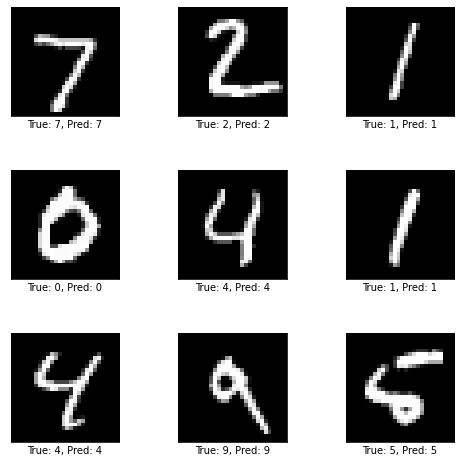

In [8]:
prediction=model.predict(x_test[0:9])
y_true_cls = np.argmax(y_test[0:9], axis=1)
y_pred_cls = np.argmax(prediction, axis=1)

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[i], cmap = 'gray')
  xlabel = "True: {0}, Pred: {1}".format(y_true_cls[i], y_pred_cls[i]) 
  ax.set_xlabel(xlabel)
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

In [9]:
# FINE TUNING CNN MODEL TRAINED ON MNIST digit dataset

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in model.layers:
    layer.trainable=False
    
# Too see if layers are trainable or not    
for layer in model.layers:
    print("{}: {}".format(layer, layer.trainable))    

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x13bb30700>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x13bb472e0>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x13da292e0>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x13da5a370>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x13da5ab20>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x13da74e20>: False
<tensorflow.python.keras.layers.core.Dropout object at 0x13da803a0>: False
<tensorflow.python.keras.layers.core.Flatten object at 0x13da80af0>: False
<tensorflow.python.keras.layers.core.Dense object at 0x13da7bee0>: False
<tensorflow.python.keras.layers.core.Dense object at 0x13da5a0a0>: False


In [10]:
# construct the head of the model that will be placed on top of the
# the base model
x = model.output

#add flatten layer so we can add the fully connected layer later
x = Flatten()(x)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

#create the new model

# place the head FC model on top of the base model (this will become
# the actual model we will train)
new_model = Model(inputs=model.input, outputs=x)

print(new_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0     

In [11]:
# Load the fashion-mnist pre-shuffled train data and test data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test1, y_test1) = fashion_mnist.load_data()

In [12]:
# Dividing the dataset in training and validation dataset
# Normalize pixel values to be between 0 and 1
X_valid1, X_train1 = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid1, y_train1 = y_train_full[:5000], y_train_full[5000:]

In [13]:
# initialize the list of class label names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
#Compile the new model created
new_model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

In [15]:
#train the model with 1 epoch on the freezed layer to train the model.
history = new_model.fit(X_train1, y_train1,batch_size=32, epochs=1, validation_data=(X_valid1, y_valid1))

1719/1719 [==============================] - 25s 14ms/step - loss: 2.2367 - accuracy: 0.1970 - val_loss: 1.9070 - val_accuracy: 0.3494


In [16]:
for layer in model.layers[2:]:
    layer.trainable = True
    
new_model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])
history = new_model.fit(X_train1, y_train1,batch_size=32, epochs=32, validation_data=(X_valid1, y_valid1))

# Evaluate the new model on test set
score1 = new_model.evaluate(X_test1, y_test1)

# Print test accuracy
print('\n', 'Test accuracy:', score1[1])

Epoch 1/32
1719/1719 [==============================] - 72s 41ms/step - loss: 1.6926 - accuracy: 0.3659 - val_loss: 1.0923 - val_accuracy: 0.5600
Epoch 2/32
1719/1719 [==============================] - 100s 58ms/step - loss: 1.1363 - accuracy: 0.5506 - val_loss: 0.8240 - val_accuracy: 0.6958
Epoch 3/32
1719/1719 [==============================] - 70s 41ms/step - loss: 0.9214 - accuracy: 0.6524 - val_loss: 0.7109 - val_accuracy: 0.7354
Epoch 4/32
1719/1719 [==============================] - 85s 49ms/step - loss: 0.8056 - accuracy: 0.7056 - val_loss: 0.6343 - val_accuracy: 0.7702
Epoch 5/32
1719/1719 [==============================] - 64s 37ms/step - loss: 0.7312 - accuracy: 0.7358 - val_loss: 0.6181 - val_accuracy: 0.7676
Epoch 6/32
1719/1719 [==============================] - 66s 38ms/step - loss: 0.6894 - accuracy: 0.7570 - val_loss: 0.5680 - val_accuracy: 0.7946
Epoch 7/32
1719/1719 [==============================] - 70s 41ms/step - loss: 0.6572 - accuracy: 0.7676 - val_loss: 0.5559 

In [19]:
X_new = X_test1[:3]
y_proba = new_model.predict(X_new)
y_proba.round(2)

# model.predict_classes() is deprecated after 01/01/2021
# model does multi-class classification
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 8, 1])

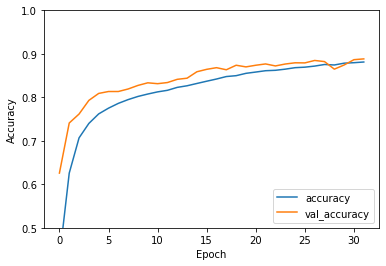

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')